ENEF21 banner here?

# Hands-on Quantum Computing with Qiskit

<!-- <img src="img/mission10000.png" align="center"> -->

&nbsp;


&nbsp;

## Contents<a id='index'></a>

&nbsp; &nbsp; 1. [Introduction](#introduction)

&nbsp; &nbsp; 2. [Single-qubit states](#single_states)

&nbsp; &nbsp; &nbsp; &nbsp; [Single-qubit operations](#single_operations)

&nbsp; &nbsp; 3. [Multi-qubit states](#multi_qubits)

&nbsp; &nbsp; 4. [Deutsch-Josza Algorithm](#DJ_alg)

&nbsp; &nbsp; 5. [IBM Q Provider](#ibmq_provider)


&nbsp;

&nbsp;

# 1. Introduction<a id='introduction'></a>


&nbsp;

## 1.1 QISKit - an overview<a id='qiskit_overview'></a>

<img src="img/qiskit-heading.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">

Qiskit is an open-source framework for working with quantum computers at the level of algorithms, quantum circuits, or even pulses. It can be installed and executed locally, but to execute your code in actual, public access quantum processors, you need to create a [IBM Quantum experience](https://quantum-computing.ibm.com) account.

Qiskit supports the *Python* language, which is itself compatible with multiple programming paradigms.


The main pillar of this toolkit (which the majority of these classes will feature) is **Qiskit Terra**.

&nbsp;

&nbsp;

<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="img/qiskit_modules.jpg" alt="Qiskit and its elements" width="700px" style="padding-bottom:0.5em;" />
    Qiskit and its elements (<a href="https://medium.com/qiskit/qiskit-and-its-fundamental-elements-bcd7ead80492">Source</a>)
</div>

&nbsp;



As of version `0.12`, Qiskit is composed of other 3 main modules:

**Aer** is a simulator framework for the stack.

<div class="alert alert-block alert-info">
Note that these simulations are performed on classical computers, and so are limited by classical resources.
</div>

**Ignis** is a framework for understanding and mitigating noise in quantum circuits and systems.

**Aqua** provides higher-level functionality by use of a library of quantum algorithms upon which applications of near term quantum computing can be built.

Qiskit is still under an intense development cycle, which means that new updates and features are added several times a year.

&nbsp;

## 1.2 The quantum bit<a id='quantum_bit'></a>

&nbsp;

### A physical qubit

Any quantum system with two orthogonal states can be used to represent a quantum bit, or *qubit* for short.

<img src="img/h_atom.png" width="200px" align="center">




How can we represent quantum states and associated operations?

&nbsp;

# 2. Single qubit states<a id='single_states'></a>

&nbsp;

A single qubit quantum state $|\psi\rangle$ can be written as a complex superposition of its basis states, which by convention are generally named $|0\rangle$ and $|1\rangle$.

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$$

Here, $\alpha$ and $\beta$ are probability amplitudes generally described by complex numbers. When the qubit is measured, the quantum system "collapses" to the state $|0\rangle$ with probability $|\alpha|^2$, or to the state $|1\rangle$ with probability $|\beta|^2$.


$|\psi\rangle$ can also be represented as a column vector of coefficients of basis states:

$$
|\psi\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}; \;\;\;
|0\rangle =
\begin{pmatrix}
1 \\
0
\end{pmatrix}; \;\;\;
|1\rangle =
\begin{pmatrix}
0 \\
1
\end{pmatrix};
$$

&nbsp;

### Bloch sphere

The absolute squares of the probability amplitudes, $|\alpha|^2$ and $|\beta|^2$, represent the probability of the corresponding measurement outcome. A basic rule for probability is that the probabilities of all possible outcomes must add up to $1$, so it follows that $\alpha$ and $\beta$ must be constrained by the equation:

$$|\alpha|^2+ |\beta|^2 = 1$$

Ignoring the global phase of a qubit, only two real numbers are required to describe a single qubit quantum state. A convenient representation is

$$|\psi\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)e^{i\phi}|1\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  

It is then possible to create a one-to-one correspondence between a qubit state ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

<img src="img/Bloch_sphere.png" alt="" width="300 px" align="center">

By contrast, a representation of a classical bit over the Bloch sphere would only require the two points of the sphere intersecting the Z axis.

&nbsp;

## 2.1 Single-Qubit Gates<a id='single_operations'></a>

&nbsp;

Quantum gates/operations are generally expressed as matrices. The action of the quantum gate on the qubit is determined by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$|\psi'\rangle = U|\psi\rangle$$

Some of the single-qubit operations available are:
- Measurement gates
- Pauli gates
- Hadamard gate
- Generalized unitary gates (with constraints)


<div class="alert alert-block alert-info">

**Importing Qiskit**

&nbsp;

The following sections will make use of Qiskit to design and visualize circuits and quantum operations. 

**The execution of the code cells in this notebook requires that the relevant Qiskit modules be imported first.**
    
To execute a code block, select a code cell and press `SHIFT + ENTER`. Consecutive cells can be executed by repeating this command.

</div>

In [1]:
# Comments on code cells are preceded by '#'

# Relevant QISKit modules

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, BasicAer, execute

from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

# Useful additional packages 

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

# Output a message to confirm all modules are imported

print("Modules successfully imported.")

Modules successfully imported.


&nbsp;

<div class="alert alert-block alert-info">
    
**Building your first quantum circuit**

&nbsp;

In Qiskit `0.12`, before building a quantum circuit, we first neet to define a `QuantumRegister(n)` object, with `n` being the desired number of qubits. 

To perform measurements, a `ClassicalRegister(m)` is also required, where `m` is the number of bits to contain the results of the measurement. 

Lastly, a `QuantumCircuit` object needs to be defined, containing a list of quantum and classical registers. Quantum operations may then be called on this object.

&nbsp;

The measurement operation `measure(qr[i], cr[j])` is called by specifying the quantum register `qr`and qubit `i` to be measured, and the classical register `cr` and bit `j` which is to store the measurement value. A measurement can also be called over the complete register, provided that registers `qr` and `cr` are the same size: `measure(qr, cr)`.

&nbsp;

A complete circuit can be visualized graphically by calling the `draw` method.

</div>

In [3]:
# Create quantum register with 2 qubits
qr = QuantumRegister(2)

# Create a classical register with 2 bits
cr = ClassicalRegister(2)

# Quantum circuit
qc = QuantumCircuit(qr, cr)

#Measurement operation
qc.measure(qr, cr)

# Draw circuit (using matplotlib)
qc.draw()

<div class="alert alert-block alert-info">
    
**Statevector simulator**

&nbsp;

Quantum states can be verified through **Aer** simulators, such as the `statevector_simulator`. This simulator is able to determine the vector describing the state of all qubits at a given point.

&nbsp;

To use it, we only need to define the the statevector simulator as our execution backend.

&nbsp;

**Note**: To get accurate results from the statevector simulator, no measurement operations can be applied to the circuit, since measurements collapse superposition states into deterministic ones.

</div>

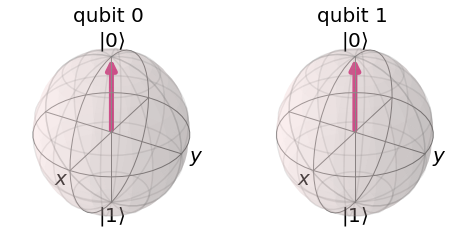

In [4]:
# First, define the statevector simulator as your backend
backend = Aer.get_backend("statevector_simulator")

# Execute circuit with the statevector simulator
result = execute(qc, backend).result()

# Get statevector representation
vector = result.get_statevector(qc)

# Draw Bloch sphere
plot_bloch_multivector(vector)

## Practical exercise: single-qubit operations

Consider you have a chip that allows you to add $X$-gates to your circuit.

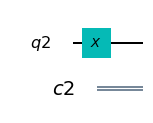

In [5]:
# Define quantum circuit qc_x
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_x = QuantumCircuit(qr,cr)

# Applying quantum gates:
# qc_x.<GATE>(qr)

# In this case you only need to replace <GATE> by x
qc_x.x(qr)

# Draw the circuit
qc_x.draw(output='mpl')

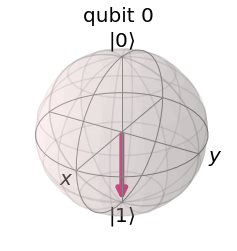

In [6]:
# Execute circuit with the statevector simulator
result_x = execute(qc_x, backend).result()

# Get statevector representation
vector_x = result_x.get_statevector(qc_x)

# Draw Bloch sphere
plot_bloch_multivector(vector_x)

### 1

Now, test how the result changes when you use the `qc_x.x(qr)` command multiple times. 

| 0 X-gates | 1 X-gate | 2 X-gates| 3 X-gates|
|-----------|----------|----------|----------|
| state 0   | state 1  | ?        | ?        |

Fill the table.

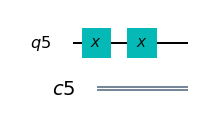

In [9]:
# Define quantum circuit qc_x
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_x = QuantumCircuit(qr,cr)


# Add 2 x-gates
qc_x.x(qr)
qc_x.x(qr)


qc_x.draw(output='mpl')

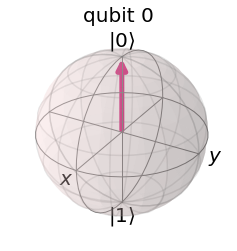

In [10]:
# Visualize Bloch sphere again
result_x = execute(qc_x, backend).result()
bloch_x = result_x.get_statevector(qc_x)
plot_bloch_multivector(bloch_x)

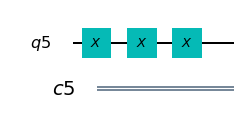

In [11]:
# You can also just add X-gates to a previously defined circuit
qc_x.x(qr)

qc_x.draw(output='mpl')

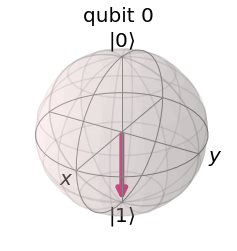

In [12]:
# Test results
result_x = execute(qc_x, backend).result()
bloch_x = result_x.get_statevector(qc_x)
plot_bloch_multivector(bloch_x)

### 2

By now your probably already notice that $X$ works like the classical NOT gate.

Let's introduce a new gate. Hadamard, the superposition gate. Qiskit simply calls it h.

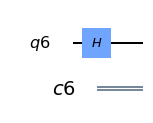

In [13]:
# Define quantum circuit qc_h
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc_h = QuantumCircuit(qr,cr)

# qc_h.<GATE>(qr)
# in this case you only need to replace <GATE> by h. See the example
qc_h.h(qr)

qc_h.draw(output='mpl')

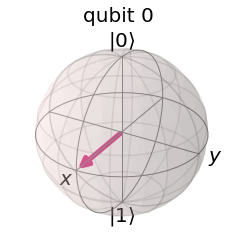

In [14]:
result_h = execute(qc_h, backend).result()
bloch_h = result_h.get_statevector(qc_h)
plot_bloch_multivector(bloch_h)

Apply the Hadamard gate some times to get an intuition about its behavior.

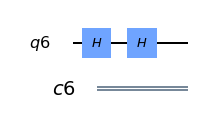

In [15]:
qc_h = QuantumCircuit(qr,cr)

# write your circuit:
qc_h.h(qr)
qc_h.h(qr)


qc_h.draw(output='mpl')

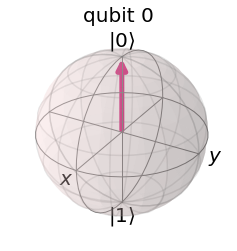

In [16]:
result_h = execute(qc_h, backend).result()
bloch_h = result_h.get_statevector(qc_h)
plot_bloch_multivector(bloch_h)

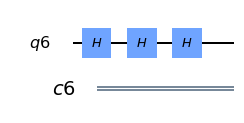

In [17]:
qc_h = QuantumCircuit(qr,cr)

# write your circuit
qc_h.h(qr)
qc_h.h(qr)
qc_h.h(qr)


qc_h.draw(output='mpl')

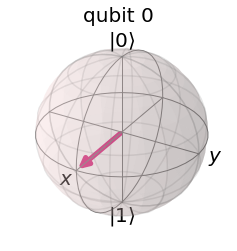

In [18]:
result_h = execute(qc_h, backend).result()
bloch_h = result_h.get_statevector(qc_h)
plot_bloch_multivector(bloch_h)

### 3

Add measure gate after an odd number of Hadamard gates.

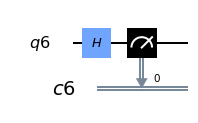

In [29]:
qc_h = QuantumCircuit(qr,cr)

# qc_h.<GATE>(qr)
# in this case you only need to replace <GATE> by h. See the example
qc_h.h(qr)
#measure gate need the classical registers
qc_h.measure(qr,cr)

qc_h.draw(output='mpl')

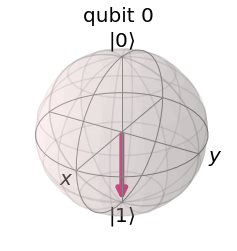

In [30]:
result_h = execute(qc_h, backend).result()
bloch_h = result_h.get_statevector(qc_h)
plot_bloch_multivector(bloch_h)

Three executions were already made, fill the table with the rest of the outputs and add executions if you want.


|execution number|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|...|
|----------------|-|-|-|-|-|-|-|-|-|--|--|--|--|--|--|---|
|output          |1|1|0| | | | | | |  |  |  |  |  |  |...|

<div class="alert alert-block alert-info">
    
The Hadamard gate creates **superposition**.

&nbsp;
  
   <p>This is the story about Schrödinger's cat. The poor cat is in a box with radioactive material, which can release some particles or not. If the material releases particles, they will set in motion a chain of events that will kill the cat. </p>
    
   - After 1 hour the cat has a probability of 50% of being dead.</p>
    
   - Since we can not be sure until we open the box, we say that can is alive and dead during that hour.</p> 
   

    
   <p>In other words, the cat is in every possible state until it is observed.</p>
    
</div>

### 4

Consider a case where our qubit started in superposition:

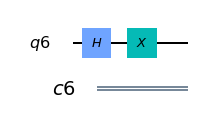

In [31]:
qc_h = QuantumCircuit(qr,cr)

# qc_h.<GATE>(qr)
# in this case you only need to replace <GATE> by h. See the example
qc_h.h(qr)
#add a x-gate:
qc_h.x(qr)

qc_h.draw(output='mpl')

What was the result?

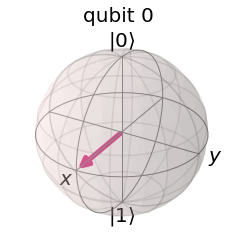

In [32]:
result_h = execute(qc_h, backend).result()
bloch_h = result_h.get_statevector(qc_h)
plot_bloch_multivector(bloch_h)

### 5

You have a new chip, which has the quantum logic gate Z.

Execute the circuit with one and two z gates.

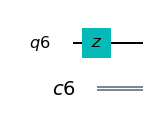

In [33]:
qc_z = QuantumCircuit(qr,cr)

# start with the default state:
# add a z-gate:
qc_z.z(qr)

qc_z.draw(output='mpl')

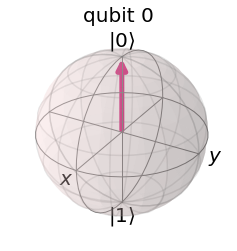

In [34]:
result_z = execute(qc_z, backend).result()
bloch_z = result_z.get_statevector(qc_z)
plot_bloch_multivector(bloch_z)

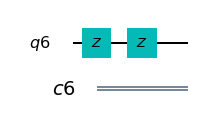

In [35]:
qc_z = QuantumCircuit(qr,cr)

# start with the default state:
# add two z-gates:
qc_z.z(qr)
qc_z.z(qr)


qc_z.draw(output='mpl')

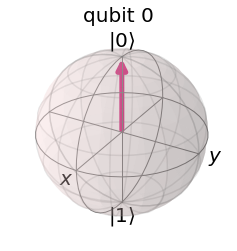

In [36]:
result_z = execute(qc_z, backend).result()
bloch_z = result_z.get_statevector(qc_z)
plot_bloch_multivector(bloch_z)

Put your circuit in superposition (use one Hadamard). 

Test your circuit twice, one with one z gate and another one with two z gates.

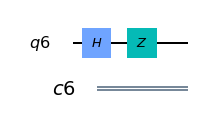

In [37]:
qc_z = QuantumCircuit(qr,cr)

# start with a superposition state:
qc_z.h(qr)
#add a z-gate:
qc_z.z(qr)

qc_z.draw(output='mpl')

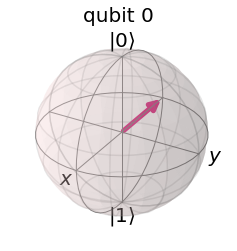

In [38]:
result_z = execute(qc_z, backend).result()
bloch_z = result_z.get_statevector(qc_z)
plot_bloch_multivector(bloch_z)

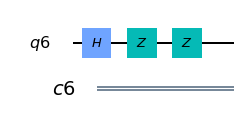

In [39]:
qc_z = QuantumCircuit(qr,cr)

# start with a superposition state:
qc_z.h(qr)

#add a z-gate:
qc_z.z(qr)
qc_z.z(qr)


qc_z.draw(output='mpl')

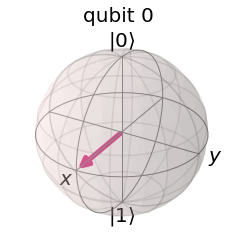

In [40]:
result_z = execute(qc_z, backend).result()
bloch_z = result_z.get_statevector(qc_z)
plot_bloch_multivector(bloch_z)

What kind of rotation is applied by Z-gate? 

### Question


I want to get from the default state 0 to state 1 but my chip is lacking the x gate. can you find a way to get the same result with Hadamard gates and $Z$-gates?

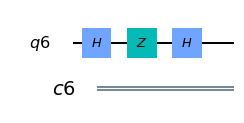

In [45]:
qc = QuantumCircuit(qr,cr)

# Add quantum operations
qc.h(qr[0])
qc.z(qr[0])
qc.h(qr[0])

qc.draw(output='mpl')

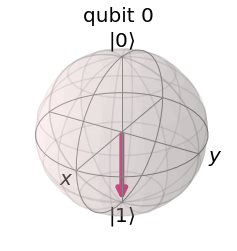

In [46]:
result = execute(qc, backend).result()
bloch = result.get_statevector(qc)
plot_bloch_multivector(bloch)

## The theory:

### Pauli gates

#### Gate $X$: bit-flip gate 

The X-gate is also known as NOT gate or “bit-flip”, since it changes a state $| 0 \rangle $ to $| 1 \rangle $ and vice versa. **This is the quantum analogue to a classical NOT gate.**

On the Bloch sphere representation, this operation corresponds to a rotation of the state around the X-axis by $\pi$ radians.

<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="img/xbloch.png" width="600 px" style="padding-bottom:0.5em;" />
    (<a href="https://qiskit.github.io/ibmqx-user-guides/beginners-guide/005-Single-Qubit_Gates/001-Single-Qubit_Gates.html">Source</a>)
</div>



#### $Y$: bit-and-phase-flip gate

It is equivalent to a rotation around Y-axis of the Bloch sphere by $\pi$ radians.
This gate maps $| 0 \rangle $ to $i | 1 \rangle $, and $| 1 \rangle$ to $ - i | 0 \rangle$

#### $Z$: phase-flip gate

It leaves the basis state $|0 \rangle $ unchanged, while mapping $| 1 \rangle$ to $- | 1 \rangle $.

### Hadamard gate

The Hadamard gate may be used to create superposition. It maps the basis state $| 0 \rangle$ to $| + \rangle =\frac{| 0 \rangle + | 1 \rangle }{\sqrt{2}}$, and $| 1 \rangle $ to $ | - \rangle =\frac{ |0 \rangle - |1 \rangle }{\sqrt{2}}$. On the Bloch sphere, $| + \rangle$ and $| - \rangle $ are represented by points on the X axis. 

When measured, these states have equal probability of becoming $| 1\rangle $ or $| 0 \rangle $, since the square modulus of the probability amplitude for each of the basis states has equal value.

<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="img/hbloch.png" width="600 px" style="padding-bottom:0.5em;" />
    (<a href="https://qiskit.github.io/ibmqx-user-guides/beginners-guide/005-Single-Qubit_Gates/002-Creating_superposition.html">Source</a>)
</div>

In fact, $|+\rangle $ and $| - \rangle $ are indistinguishable when measured on the computational basis. However, the states can be identified by measuring the qubit on the superposition basis, i.e. along the X-axis. A way to achieve this is by simply applying an Hadamard gate before performing the measurement.

&nbsp;

**Note**: The Hadamard gate, along with the X, Y and Z gates, is self-inverse: $H.H = I$.

<div class="alert alert-block alert-info">

**Gates and basis**

&nbsp;

The below diagram is a useful shorthand for quantum states conversion using quantum gates. It also depicts how quantum operations are reversible. A qubit in any of the four states $|0\rangle$, $|1\rangle$, $|-\rangle$, $|+\rangle$  can be converted to any other performing simple one qubit gates.

&nbsp;

<img src="img/h_x_z.png" alt="" width="400 px" align="center">                                                                                                  

&nbsp;


</div>

&nbsp;

## Practical exercise: multi-qubit operations

<div class="alert alert-block alert-info">
    
What about **entanglement**? </p>

&nbsp;
    
   <p>Let's get the poor cat again. Now the cat has a friend. they are both inside boxes. and they are entangled. </p>
    
   <p>I can take my cat home (box A) and you take your cat home (box B). Eventually, I open my box and I find my cat is dead, but at the same time, I know that your cat is alive. I didn't have to call you but I know this. </p>
    
</div>

In quantum computation, entanglement is obtained by control gates.

Test the gate $CX$, also called controlled-$NOT$

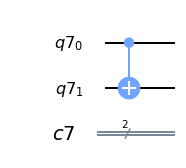

In [47]:
# The control gate is a multi qubit gate
# You now need two qubits - and two bits to store the results
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc_cx = QuantumCircuit(qr,cr)

# qc_cx.<GATE>(qr[n], qr[m])
# in this case you only need to replace <GATE> by cx.
# and you also need to change n and m, 
# n will be the control qubit and m the target qubit

# See the example
qc_cx.cx(qr[0],qr[1])

qc_cx.draw(output='mpl')

Test this circuit.

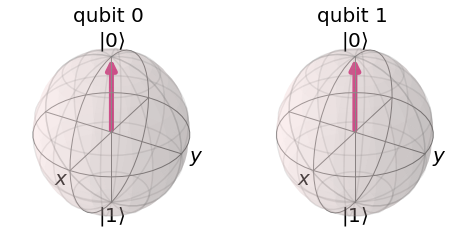

In [21]:
result = execute(qc_cx, backend).result()
bloch = result.get_statevector(qc_cx)
plot_bloch_multivector(bloch)

### 1

Change the initial state of the qubits and test cx. 

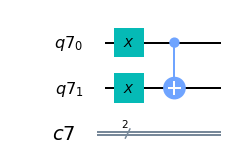

In [52]:
qc_cx = QuantumCircuit(qr,cr)

# Add x and h gate to the circuit to fill the table below
qc_cx.x(qr[0])
qc_cx.x(qr[1])
# Now we have the control gate  
qc_cx.cx(qr[0],qr[1])

qc_cx.draw(output='mpl')

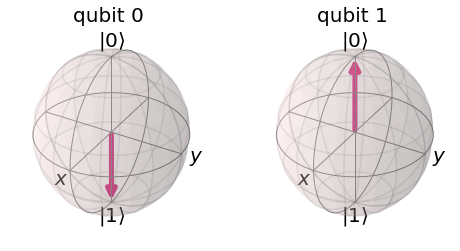

In [53]:
result_cx = execute(qc_cx, backend).result()
bloch_cx = result_cx.get_statevector(qc_cx)
plot_bloch_multivector(bloch_cx)

Fill the table, feel free to add your tests.

|input  |        |output   |        |
|-------|--------|---------|--------|
|qubit 0| qubit 1| qubit 0 | qubit 1|
|   0   | 0      |    0    |   0    |
|   1   | 0      |         |        |
|   0   | 1      |         |        |
|   1   | 1      |         |        |
|   H   | 0      |         |        |
|   H   | H      |         |        |

### 2

Now let's test something less trivial.

$CZ$ gate - control with gate $Z$ - is not in the list of the gate we can simply write in Qiskit.

Find a circuit that does the same as a control-$Z$. (exercise 6 may help you)

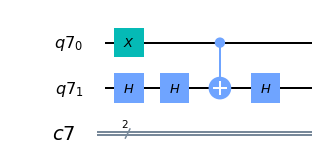

In [57]:
qc_cz = QuantumCircuit(qr,cr)

# Write your circuit:
qc_cz.x(qr[0])
qc_cz.h(qr[1])
qc_cz.h(qr[1])
qc_cz.cx(qr[0],qr[1])
qc_cz.h(qr[1])

qc_cz.draw(output='mpl')

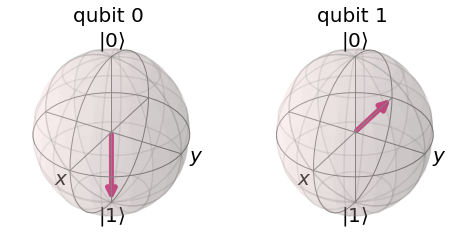

In [58]:
result = execute(qc_cz, backend).result()
bloch = result.get_statevector(qc_cz)
plot_bloch_multivector(bloch)

&nbsp;

# 3. Multi-qubit states<a id='multi_qubits'></a>

&nbsp;

Multiple quantum bits can be described with the ket notation. The tensor product is typically implicit; for a state composed of qubits $q_0$ and $q_1$:

&nbsp;

$$
|q_1\rangle \otimes |q_0\rangle =  |q_1\rangle |q_0\rangle = |q_1 q_0\rangle
$$


&nbsp;

### Entanglement and Bloch sphere for multi-qubit states

&nbsp;

Since qubits can be entangled, multi-qubit states, in general, cannot be expressed by simply representing each qubit's Bloch sphere. This is because the dimension of the vector space rises exponentially with the number of qubits, to account for correlation between qubits. One attempt to visualize multi-qubit states is made [here](https://medium.com/qiskit/visualizing-bits-and-qubits-9af287047b28). 

**For a quantum system, its description is more than the sum of descriptions for each individual qubit.**

&nbsp;

## 3.1 Multi-qubit operations<a id='multi_ops'></a>

&nbsp;

### CNOT gate 

The controlled-NOT (or controlled-$X$) gate allows for the creation of entanglement between two qubits in a quantum circuit. The CNOT gate's action on basis states is to flip, i.e. apply an $X$ gate to, the target qubit (denoted as $\oplus$ in quantum circuits) if the control qubit  (denoted as $\bullet$), is $|1\rangle$; otherwise the target qubit goes unchanged.


### Other multi-qubit operations

General single qubit gates together with the $CNOT$ allow for universal quantum computations, i.e. it is possible to decompose any quantum operations over $n$ qubits to arbitrary precision, using only this set of gates. How to efficiently determine and perform such a decomposition, however, is not a trivial problem.
    
Other notable operators:

- __SWAP gate__, which exchanges the state between two qubits;

&nbsp;

- __Toffoli gate__ (or **CCNOT**), which performs a NOT operations on a target qubit, using two other qubits as controls.

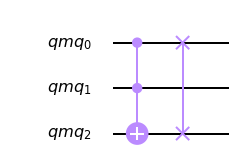

In [16]:
# Create registers and quantum circuit
qr = QuantumRegister(3, 'qmq')
qc_mq = QuantumCircuit(qr)

# Apply Toffoli - first two arguments are the controls
qc_mq.ccx(qr[0], qr[1], qr[2])

# Swap two qubits
qc_mq.swap(qr[1], qr[2])

# Draw the circuit
qc_mq.draw(output='mpl')

<div class="alert alert-block alert-info">

You can view a more extensive list of quantum operations on [Qiskit's online tutorials](https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorials/blob/master/qiskit/fundamentals/7_summary_of_quantum_operations.ipynb).

</div>

    
## Simulating measurements in a quantum circuit



<div class="alert alert-block alert-info">
    
&nbsp;

The **Aer** component allows for the simulation of the execution and measurement of a quantum circuit, locally, for a small number of qubits, using the `qasm_simulator`.

&nbsp;

For that, we need to call the simulator using the `BasicAer.get_backend` method. We then define a *job*, i.e. the task assigned to a specific backend - simulator or real quantum processor - by calling the function `execute(qc, backend, shots)`, where `qc` is the quantum circuit to be executed, `backend` is the execution backend, and `shots` is the number of executions to be performed.

&nbsp;

After the job is executed, we can extract a `result()`, which allows us to get the measurement result frequencies with `get_counts(qc)`, and, from that, plot an histogram of probabilities with the function `plot_histogram(counts)`.



</div>

### Measurement gate

A measurement causes the system to collapse to a deterministic state i.e. stabilise in a non-reversible way. A repeated measurement of the collapsed quantum system will return the same results, just like repeated readings of a bit string.

When we perform a measurement on a qubit, we observe either $|0\rangle$ or $|1\rangle$ - which is then interpreted as a binary digit, $0$ or $1$. As such, a single measurement of a quantum system yields at most 1 bit per qubit. When a quantum system is in a superposition of basis states, many more measurements are needed to accurately estimate probability amplitudes.

&nbsp;

<div class="alert alert-block alert-info">

&nbsp;

- In Qiskit, measurement operations can be performed by defining the correspondence between the measured qubit and the bit where the result of the operation (0 or 1) is going to be stored. 



- Since the measuring process physically collapses the qubit into a classical state, QISKit does not allow for subsequent quantum operations on the measured qubit.

&nbsp;

</div>



{'01': 503, '00': 497}


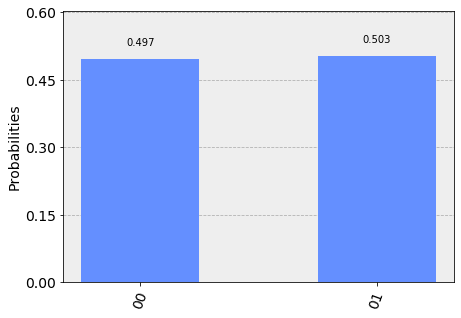

In [59]:
# Use Aer's qasm_simulator
q_simulator = BasicAer.get_backend('qasm_simulator')

# Define a quantum circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
q_meas = QuantumCircuit(qr,cr)

# Add quantum operations, for example H
q_meas.h(qr[0])


# Measure the qubits
q_meas.measure(qr, cr)


# Execute the circuit 1000 times on the qasm simulator
job_a = execute(q_meas, q_simulator, shots=1000)

# Grab the results from the job
result_a = job_a.result()
counts_a = result_a.get_counts(q_meas)

# Print frequencies, and plot histogram
print(counts_a)
plot_histogram(counts_a)


## Exercise - Quantum half-adder

&nbsp;

The half adder produces the addition of bits. Classicaly, the inputs **A** and **B** are added, and give the output **S** (sum) and **C** (carry), a bit that flips from $0$ to $1$ if both inputs are $1$.



<img src="img/Half_Adder.png" alt="" width="400 px" align="center">

&nbsp;

The truth table of inputs and outputs is below; consider that $q_0$ is left unchanged after the block, and $q_2$ is in the state $|0\rangle$ at input.


<table>
  <tr>
    <th>$q_0$ (input) = A</th>
    <th>$q_1$ (input) = B</th>
    <th>$q_1$ (output) = S</th>
    <th>$q_2$ (output) = C</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <th>0</th>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>1</td>
    <td>0</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
  </tr>
</table>


To build the equivalent block with quantum circuits, we will need 3 qubits, which is the minimum number of qubits to guarantee that this block is reversible. 



<img src="img/q_half_add.png" alt="" width="400 px" align="center">

&nbsp;

 1. Using $CNOT$ and/or ***Toffoli*** gates, build a quantum half-adder circuit.</p>
 2. How to interpret the result when the inputs are in superposition?</p>



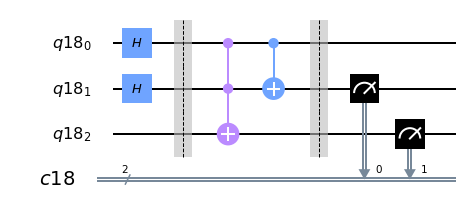

In [75]:
# Create registers
qr = QuantumRegister(3)
cr = ClassicalRegister(2)

# Quantum Circuit
half_adder = QuantumCircuit(qr, cr)

# Prepare input states. Example: A=1, B=0
half_adder.h(qr[0])
half_adder.h(qr[1])

# Barriers make circuits prettier
half_adder.barrier()

# Perform multiqubit operations
half_adder.ccx(qr[0],qr[1],qr[2])
half_adder.cx(qr[0],qr[1])


# Barriers make circuits prettier
half_adder.barrier()

# Measure
half_adder.measure(qr[1], cr[0])
half_adder.measure(qr[2], cr[1])

# Draw
half_adder.draw(output='mpl')

{'01': 524, '10': 244, '00': 232}


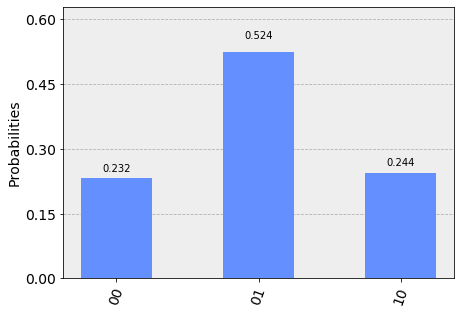

In [76]:
job_ha = execute(half_adder, q_simulator, shots=1000)

counts_ha = job_ha.result().get_counts(half_adder)

print(counts_ha)

plot_histogram(counts_ha)

&nbsp;

# 4. Deutsch-Josza Algorithm <a id ='DJ_alg'></a>

### Problem formulation

Consider a function $f: \{0,1\}^n \rightarrow \{0,1\}$ that maps an array of $n$  bits into either 0 or 1. We do not know the logic behind it. **We know that it is either constant or balanced**:
- **Constant**: its output is always 0 or always 1;
- **Balanced**: outputs 0 for half the input values and 1 for the other half.


For the case that $n=1$ we have $f: \{0,1\} \rightarrow \{0,1\}$ that maps a single bit into either 0 or 1. We are given a black box, an **oracle**, that takes as input a bit and outputs the unknown value.
<p>
<center>
<img src="files/img/c_oracle.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px">
</center>



<div class="alert alert-block alert-info">

To answer this question classically, we would always need two function invocations. We could do $f(0)$ and $f(1)$ and see if it is either constant or balanced. 

With a quantum computer, we can do a ***single pass*** over the oracle gate discover whether it is constant or balanced, an impossible feat in classical computing. 

Generalizing for a function $f: \{0,1\}^n \rightarrow \{0,1\}$, a classical algorithm would need $2^{n-1}+1$ passes, while **a quantum function would still require 1 pass**.

</div>


<p>

### Algorithm

<center>
<img src="files/img/q_oraclen.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px">
</center>

<p>
<p>


What are the results of measurement?
- if f is constant $\rightarrow$ output is $|0 \cdots 0\rangle$
- if f is balanced $\rightarrow$ output is otherwise.

&nbsp;


### The Deutsch-Josza algorithm demonstrates quantum paralelism

A quantum register has the ability to exist in a superposition of base states - each one may be thought of as a single argument to a function. 

A function performed on the register in a superposition of states is thus performed on each of the components of the superposition, _while only being applied once_.


&nbsp;

### Exercise

1. Implement the Deutsch-Josza algorithm arount the _black box_ in the circuit below. Use the results to find if the box is encoding a constant or a balanced function.

2. Verify the result by building a truth table for the oracle (below).

|input  |        |output   |
|-------|--------|---------|
|qubit 0| qubit 1| qubit 2 |
|   0   | 0      |         |
|   1   | 0      |         |
|   0   | 1      |         |
|   1   | 1      |         |

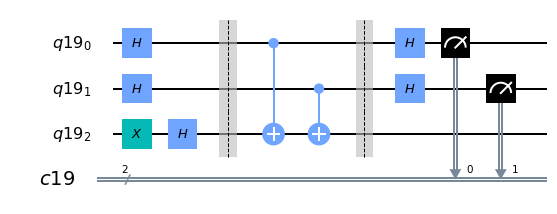

In [77]:
# A quantum circuit with 3 qubits and 2 bits
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

# Flip the last qubit to |1>, add Hadamards to whole register
qc.x(qr[2])
qc.h(qr)


# Oracle
qc.barrier()
qc.cx(qr[0],qr[2])
qc.cx(qr[1],qr[2])
qc.barrier()

# Return qubits to the computational basis
qc.h(qr[0])
qc.h(qr[1])

# Measure
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

# Draw the circuit
qc.draw(output='mpl')

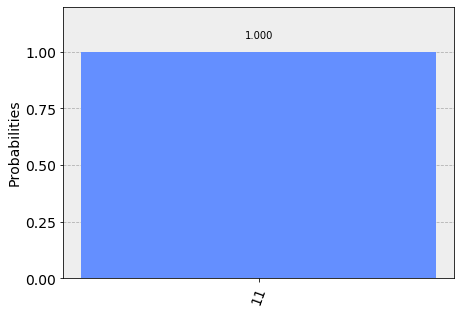

In [78]:
backend = BasicAer.get_backend("qasm_simulator")

shots = 1
job_DJ_s = execute(qc, backend, shots=shots)

result_DJ_s = job_DJ_s.result()
counts_DJ_sim = result_DJ_s.get_counts(qc)

plot_histogram(counts_DJ_sim)

# 5. IBM Q Provider <a id ='ibmq_provider'></a>
### Running circuits on an real quantum chip

In [79]:
# Import the IBMQ provider
from qiskit import IBMQ

# Load account credentials
# IBMQ.load_account()

# Or you can use:
IBMQ.enable_account("APItoken")

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [80]:
# Checking the available backends from the IBMQ provider

my_provider_ibmq = IBMQ.get_provider(hub='ibm-q', group='open', project='main') 

my_provider_ibmq.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [81]:
# Backend overview
import qiskit.tools.jupyter

%qiskit_backend_overview

In [83]:
# Define backend
backend = my_provider_ibmq.get_backend('ibmqx2')

# See backend information
backend

# Or alternatively
# backend_monitor(backend)

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

## 5.1. Running in Real Device <a id='run_r'></a>

In [84]:
# Monitor queued jobs
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='610px', min_width='610px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [85]:
# Define number of experiments
shots = 1024
job_DJ_r = execute(qc, backend, shots=shots)

# Save job ID if you wish to retrieve results later
jobID_DJ_r = job_DJ_r.job_id()

print('JOB ID: {}'.format(jobID_DJ_r))

JOB ID: 5db1c8ecc5bfb6001221571a


In [86]:
# Now you can retrieve job using the ID
job_get=backend.retrieve_job(jobID_DJ_r)

# Get measurement information
counts_DJ_run = job_get.result().get_counts(qc)

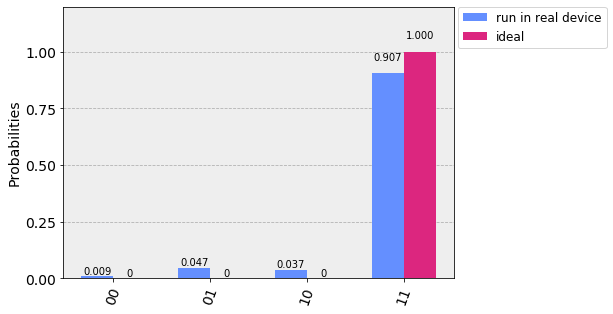

In [87]:
plot_histogram([counts_DJ_run, counts_DJ_sim ], legend=[ 'run in real device', 'ideal'])

## 5.2. Transpiler <a id = 'transpiler'></a> 

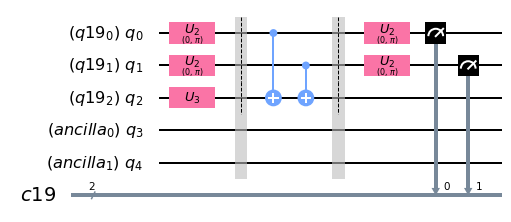

In [88]:
from qiskit.compiler import transpile

backend = my_provider_ibmq.get_backend('ibmqx2')

qc_t_real = transpile(qc, backend=backend)

qc_t_real.draw(output='mpl', scale=0.5)

In [89]:
qc.depth()

6

In [90]:
qc_t_real.depth()

5

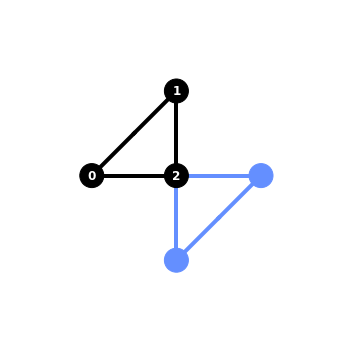

In [91]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_t_real, backend)

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

## Thank you!

 - Afonso Rodrigues: afmig1@gmail.com
 - Ana Neri: aicneri@gmail.com